<a href="https://colab.research.google.com/github/ayannj13/Data-Science/blob/main/Homework3_AyanJamal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Q1-Read the data https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv


data="https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv"

df=pd.read_csv(data)

The description of dataset is given below.

•	ID: Uniquely identifies each observation (diamond)

•	Carat Weight: The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip

•	Cut: One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)

•	Color: One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)

•	Clarity: One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)

•	Polish: One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Symmetry: One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Report: One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities

•	Price: The The amount in USD that the diamond is valued


In [5]:
#Q2-Get first 2 rows of data
df.head(2)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470


In [7]:
#Q3-Check if there is missing value

missing_values = df.isnull().sum()
print(missing_values)

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [9]:
#Q4- Get data information and number of rows and columns
df.info()

num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB
Number of rows: 6000
Number of columns: 8


In [30]:
#Q5-Get descriptive statistics of data
description = df.describe(include='all')

description

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
count,6000.000000,6000,6000,6000,6000,6000,6000,6000.000000
unique,NaN,5,6,7,4,4,2,NaN
top,NaN,Ideal,G,SI1,EX,VG,GIA,NaN
freq,NaN,2482,1501,2059,2425,2417,5266,NaN
mean,1.334520,NaN,NaN,NaN,NaN,NaN,NaN,11791.579333
std,0.475696,NaN,NaN,NaN,NaN,NaN,NaN,10184.350051
min,0.750000,NaN,NaN,NaN,NaN,NaN,NaN,2184.000000
25%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,5150.500000
50%,1.130000,NaN,NaN,NaN,NaN,NaN,NaN,7857.000000
75%,1.590000,NaN,NaN,NaN,NaN,NaN,NaN,15036.500000


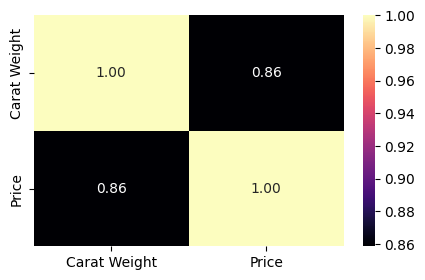

In [34]:
#Q6-Use seasoborns heat map to generate following heatmap
# annot = True to print the correlation inside the square

#only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])

corr = numerical_df.corr()

#heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(corr, annot=True, cmap="magma", fmt=".2f")
plt.show()

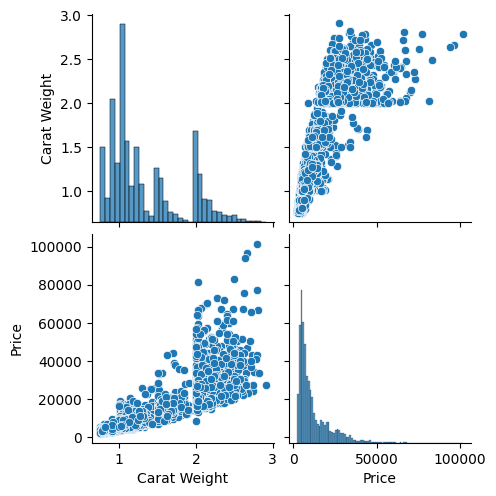

In [35]:
#Q7-Use seasoborns paiplot to generate following  diagram

#only numerical columns for pairplot
numerical_df = df[['Carat Weight', 'Price']]

#pairplot
sns.pairplot(numerical_df)
plt.show()

In [36]:
#Q8-Divide the data so that get Price as ouput variable (Y) and other variables as input varable (X)

#dividing input x and output y variables
X = df.drop(columns=['Price'])
Y = df['Price']

print("Input Variables (X):")
print(X.head())

print("\nOutput Variable (Y):")
print(Y.head())

Input Variables (X):
   Carat Weight    Cut Color Clarity Polish Symmetry Report
0          1.10  Ideal     H     SI1     VG       EX    GIA
1          0.83  Ideal     H     VS1     ID       ID   AGSL
2          0.85  Ideal     H     SI1     EX       EX    GIA
3          0.91  Ideal     E     SI1     VG       VG    GIA
4          0.83  Ideal     G     SI1     EX       EX    GIA

Output Variable (Y):
0    5169
1    3470
2    3183
3    4370
4    3171
Name: Price, dtype: int64


In [37]:
#Q9-Create dummy for the input variables (X)

#converting categorical variables into dummy variables
X_dummies = pd.get_dummies(X, drop_first=True)

print(X_dummies.head())

   Carat Weight  Cut_Good  Cut_Ideal  Cut_Signature-Ideal  Cut_Very Good  \
0          1.10     False       True                False          False   
1          0.83     False       True                False          False   
2          0.85     False       True                False          False   
3          0.91     False       True                False          False   
4          0.83     False       True                False          False   

   Color_E  Color_F  Color_G  Color_H  Color_I  ...  Clarity_VS2  \
0    False    False    False     True    False  ...        False   
1    False    False    False     True    False  ...        False   
2    False    False    False     True    False  ...        False   
3     True    False    False    False    False  ...        False   
4    False    False     True    False    False  ...        False   

   Clarity_VVS1  Clarity_VVS2  Polish_G  Polish_ID  Polish_VG  Symmetry_G  \
0         False         False     False      False       

In [38]:
#Q10 -Split the input and output data into two parts: test data (20%) and train data(%80)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_dummies, Y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape, Y_train.shape)
print("Testing data shape:", X_test.shape, Y_test.shape)

Training data shape: (4800, 23) (4800,)
Testing data shape: (1200, 23) (1200,)


In [40]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

In [41]:
#Q11 Use Linear regression to evaluate the performance of test and train data of Linear model  using evalmetric
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# training the model on the training data
model.fit(X_train, Y_train)

# make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

#evaluate
print("Training Data Performance:")
evalmetric(Y_train, Y_train_pred)

print("\nTesting Data Performance:")
evalmetric(Y_test, Y_test_pred)

Training Data Performance:
MSE: 13617878.611029424
RMSE: 3690.240996334714
MAE: 2420.3923973752335
MAPE: 28.436213974145286
R-Squared: 0.8677546171602639

Testing Data Performance:
MSE: 16395263.35943688
RMSE: 4049.1064890216066
MAE: 2386.8817587054814
MAPE: 27.98432467278652
R-Squared: 0.8461544250476121


Q12 -Based on the performance of test and training model, can we say there is overfitting or not in the performace of liner model?

No, there is no significant overfitting. Because, the training R-squared value = 0.868 and the testing R-squared value = 0.846 are close, and this means the model generalizes well. Also, The RMSE and MAPE values for test and train data are also close too, this also shows that there is no major performance gap.
So, there is a small difference, but if the training error were much lower than the test error, it would show that there can be overfitting. But in our case, there is no strong indication of overfitting.

In [42]:
#Q13- Use Lasso regression to evaluate the performance of test and train data   using evalmetric
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, Y_train)

# make predictions on both training and testing sets
Y_train_pred_lasso = lasso_model.predict(X_train)
Y_test_pred_lasso = lasso_model.predict(X_test)

# evaluate performance
print("Lasso Regression - Training Data Performance:")
evalmetric(Y_train, Y_train_pred_lasso)

print("\nLasso Regression - Testing Data Performance:")
evalmetric(Y_test, Y_test_pred_lasso)

Lasso Regression - Training Data Performance:
MSE: 13634771.172894873
RMSE: 3692.529102511566
MAE: 2423.671294929327
MAPE: 28.494802094772435
R-Squared: 0.8675905708080495

Lasso Regression - Testing Data Performance:
MSE: 16382531.14330739
RMSE: 4047.5339582648826
MAE: 2389.974136155326
MAPE: 28.046626630847136
R-Squared: 0.8462738982800888


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.937e+10, tolerance: 4.943e+07
  model = cd_fast.enet_coordinate_descent(


In [43]:
#Q14 Use Ridge regreesionto evaluate the performance of test and train data   using evalmetric
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, Y_train)

Y_train_pred_ridge = ridge_model.predict(X_train)
Y_test_pred_ridge = ridge_model.predict(X_test)

print("Ridge Regression - Training Data Performance:")
evalmetric(Y_train, Y_train_pred_ridge)

print("\nRidge Regression - Testing Data Performance:")
evalmetric(Y_test, Y_test_pred_ridge)

Ridge Regression - Training Data Performance:
MSE: 13633584.50174035
RMSE: 3692.3684135985604
MAE: 2423.923392207977
MAPE: 28.50035533850234
R-Squared: 0.8676020947601725

Ridge Regression - Testing Data Performance:
MSE: 16383152.01288278
RMSE: 4047.6106548039893
MAE: 2390.3505348630265
MAPE: 28.053342005874814
R-Squared: 0.8462680723269035


Q15- Did you get any improvement on test data using Ridge and Lasso?
Explain why?

No, Ridge and Lasso did not significantly improve test performance. The results are almost the same as Linear Regression. This means regularization didn’t have that much effect. Lasso also showed a warning, which may suggest the model may need tuning. So, the original linear regression model was already performing well.

In [44]:
#Q16-Use Decison Tree Regression to evaluate the performance of test and train data   using evalmetric
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, Y_train)

Y_train_pred_tree = tree_model.predict(X_train)
Y_test_pred_tree = tree_model.predict(X_test)

#evaluate performance
print("Decision Tree Regression - Training Data Performance:")
evalmetric(Y_train, Y_train_pred_tree)

print("\nDecision Tree Regression - Testing Data Performance:")
evalmetric(Y_test, Y_test_pred_tree)

Decision Tree Regression - Training Data Performance:
MSE: 83753.97633482143
RMSE: 289.40279254841585
MAE: 77.53468948412699
MAPE: 0.7629440866398477
R-Squared: 0.999186651828738

Decision Tree Regression - Testing Data Performance:
MSE: 3377642.2571009025
RMSE: 1837.836297688372
MAE: 888.5465218253969
MAPE: 7.167853834215014
R-Squared: 0.9683057659010964


In [45]:
#Q17-Use Random Forest to evaluate the performance of test and train data   using evalmetric
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, Y_train)

Y_train_pred_rf = rf_model.predict(X_train)
Y_test_pred_rf = rf_model.predict(X_test)

print("Random Forest Regression - Training Data Performance:")
evalmetric(Y_train, Y_train_pred_rf)

print("\nRandom Forest Regression - Testing Data Performance:")
evalmetric(Y_test, Y_test_pred_rf)

Random Forest Regression - Training Data Performance:
MSE: 459930.07480541855
RMSE: 678.181446815982
MAE: 315.2863189831003
MAPE: 2.5137504528128867
R-Squared: 0.995533545968541

Random Forest Regression - Testing Data Performance:
MSE: 1662704.1117658145
RMSE: 1289.4588445413117
MAE: 664.0046578063602
MAPE: 5.445649651388347
R-Squared: 0.9843979529671247


Q18-Why Random forest perform better than Decison Tree on test data?

Random forest performs better than a decision tree because it reduces overfitting by averaging multiple decision trees. A single decision tree memorizes the training data, and it leads to very low training error (R² = 0.999) but it's worse in generalizing on test data (R² = 0.968). However, random forest combines multiple trees, and this makes it more stable and improves test accuracy (R² = 0.984). It prevents overfitting, it gets lower errors (MSE, RMSE, MAE) on test data. Therefore, random forest is a more reliable model for prediction.

Q19- Which regression technique among Linear Regresssion, Lasso Regression ,Ridge Regression, Decision Tree and Random Forest  provide best performance on test data?

Among all the models I tried, random forest gave the best performance on test data. It has the highest R² score (0.984) and the lowest Mean Squared Error (MSE = 1,662,704) compared to other models. Linear, lasso, and ridge Regression had similar performance but they were not as strong as random forest. Decision tree performed worse as it caused overfitting, with a higher test error (MSE = 3,377,642). Since Random Forest reduces overfitting by averaging multiple trees, it generalizes better and makes more accurate predictions. So random forest was the best regression model in this case.